In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target

In [3]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data["MEDV"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Впредь ___df___ будут обозначаться исходные (неотредактированные) данные, а ___data___ - данные без выбросов

- `CRIM` — уровень преступности на душу населения;
- `ZN` — процент земли, застроенной жилыми домами (только для участков площадью свыше 25000 кв. - футов);
- `INDUS` — процент деловой застройки;
- `CHAS` — 1, если участок граничит с рекой; 0 в противном случае (бинарный признак);
- `NOX` — концентрация оксида азота, деленная на 10^7;
- `RM` — среднее число комнат (по всем домам рассматриваемого участка);
- `AGE` — процент домов, построенных до 1940 г. и занимаемых владельцами;
- `DIS` — взвешенное расстояние до 5 деловых центров Бостона;
- `RAD` — индекс удаленности до радиальных магистралей;
- `TAX` — величина налога в `$10000`;
- `PTRATIO` — количество учащихся, приходящихся на одного учителя (по городу);
- `B` = 1000(AA − 0.63)^2, где `AA` — доля афро-американцев;
- `LSTAT` — процент жителей с низким социальным статусом;
- `MEDV` — Median value of owner-occupied homes in `$1000`.
Признак `CHAS` — бинарный, остальные — количественные. Выходом является переменная `MEDV`, равная медианному значению цены строения (по всем домам участка) в `$1000`.

> Объясните почему значение коэффициента корреляции между `MEDV` и переменными `RM` и `LSTAT` имеет противоположные знаки (исходя из описания переменных).

> ___Показатель RM (количество комнат) имеет положительное влияние на стоимоть жилья, в то время как LSTAT (процент жителей с низким социальным статусом) имеет негативное влияние на стоимость жилья___

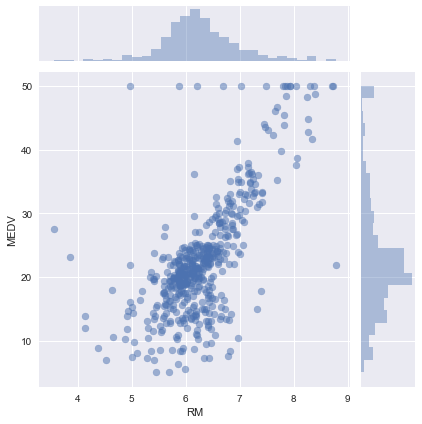

In [4]:
sns.jointplot(data["RM"], data["MEDV"], kind="scatter", joint_kws={"alpha":0.5});

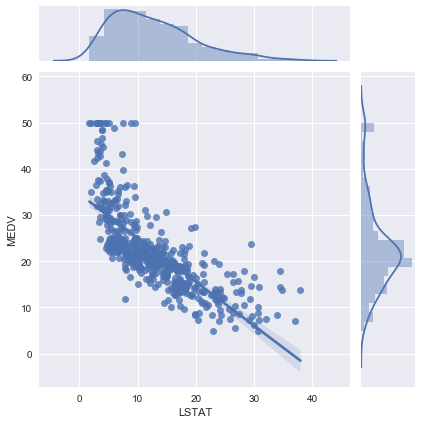

In [5]:
sns.jointplot(data["LSTAT"], data["MEDV"], kind="reg");

Также можем сделать следующие предположения:

- 16 наблюдений `MEDV` имеют значение 50.0. Скорее всего эти наблюдения содержали пропуски или не было возможности указать действительную цену дома, поэтому эти наблюдения могут быть исключены из набора данных.
- одно наблюдение признака `RM` имеет значение 8.78. Это наблюдение может рассматриваться как выброс и может быть исключено из набора данных;
- два наблюдения признака `RM` имеют значения меньше 4. Наблюдения можно рассматривать как выбросы и должны быть исключены из набора данных.

Итак, модель которую мы будем строить имеет следующий вид:

$$MEDV = \theta_0 + \theta_1 \times RM$$

Исключаем выбросы для ___data___

In [4]:
data = data.loc[data['MEDV'] != 50]
data = data.loc[data['RM'] != 8.78]
data = data.loc[data['RM'] > 4]

Также я посчитал выбросами значения `MEDV` равные 5.0

In [5]:
data = data.loc[data['MEDV'] != 5]
data.shape

(485, 14)

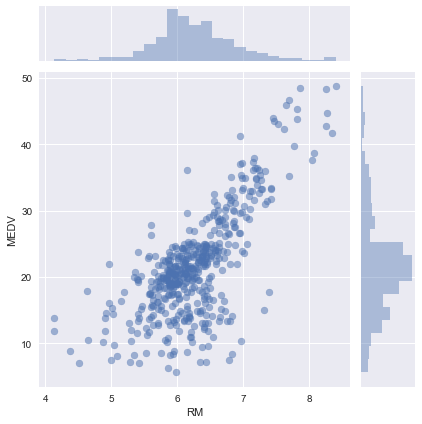

In [6]:
sns.jointplot(data["RM"], data["MEDV"], kind="scatter", joint_kws={"alpha":0.5});

In [7]:
X = data["RM"]
y = data["MEDV"]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [9]:
class GDRegressor:

    def __init__(self, alpha=0.04, n_iter=100, progress=True):
        self.alpha = alpha
        self.n_iter = n_iter
        self.disable = not progress
        

    def fit(self, X, y):
        # PUT YOUR CODE HERE
        theta_zero = 0
        theta_one = 0
        theta_zero_history = []
        theta_one_history = []
        cost_history = []
        grad_zero_history = []
        grad_one_history = []
        
        for i in range(self.n_iter):
            for_cost = 0
            error_zero = 0
            error_one = 0
            
            for j in range(len(list(X))):
                error_one += ((theta_zero + theta_one*(list(X)[j]) - list(y)[j])*(list(X)[j]))
            for j in range(len(list(X))):
                error_zero += (theta_zero + theta_one*(list(X)[j]) - list(y)[j])
                for_cost += (theta_zero + theta_one*(list(X)[j]) - (list(y)[j]))**2
            
            grad_one = error_one*self.alpha/len(list(y))
            grad_zero = error_zero*self.alpha/len(list(y))
            theta_zero -= grad_zero
            theta_one -= grad_one
            
            theta_zero_history.append(theta_zero)
            theta_one_history.append(theta_one)
            cost = for_cost/(2*len(list(y)))
            cost_history.append(cost)
            grad_zero_history.append(grad_zero/self.alpha)
            grad_one_history.append(grad_one/self.alpha)
            
            self.grad_zero_history = grad_zero_history
            self.grad_one_history = grad_one_history
            self.loss_history = cost_history
            self.intercept_history = theta_zero_history
            self.coef_history = theta_one_history
            self.coef_ = theta_one
            self.intercept_ = theta_zero
        return self.coef_, self.intercept_

    def predict(self, X_test):
        predictions = []
        
        for i in range(len(list(X_test))):
            predictions.append(self.coef_*list(X_test)[i]+self.intercept_)
        
        self.predictions = predictions
        return self.predictions

In [10]:
model = GDRegressor(alpha=0.04, n_iter=100)
%time model.fit(X_train, Y_train)

Wall time: 11.2 s


(3.5985146558596313, -0.6278515314345957)

In [141]:
model.coef_, model.intercept_

(3.5985146558596313, -0.6278515314345957)

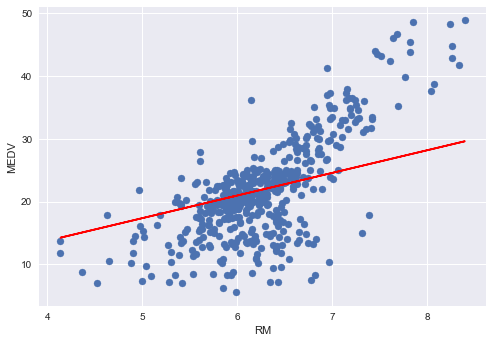

In [409]:
plt.scatter(data["RM"], data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_train, model.coef_ * X_train + model.intercept_, "r");

In [410]:
def plot_coeffs(model):
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    plt.plot(list(range(model.n_iter)), model.intercept_history)
    plt.subplot(122)
    plt.plot(list(range(model.n_iter)), model.coef_history);

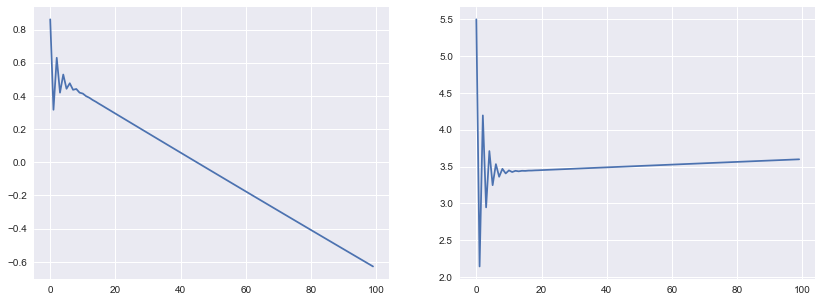

In [411]:
plot_coeffs(model)

In [412]:
def plot_loss_function(model):
    plt.xlabel("Iterations")
    plt.ylabel("Average square loss")
    plt.plot(np.arange(model.n_iter), model.loss_history);

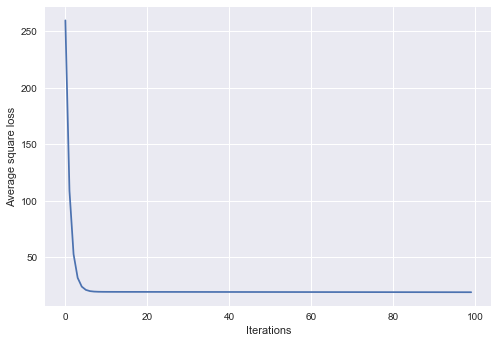

In [413]:
plot_loss_function(model)

### Оценка качества модели

Итак, мы нашли коэффициенты $\theta$, теперь надо как-то оценить качество работы полученной модели. Для этого мы воспользуемся коэффициентом детерминации $R^2$:

$$R^2 = 1 - \frac{\sum_{i=1}^{m}(y_i - \hat{y_i})^2}{\sum_{i=1}^{m}(y_i - \overline{y})^2}$$

и среднеквадратичной ошибкой:

$$RMSE = \sqrt{\frac{\sum_{i=1}^{m}(\hat{y_i} - y_i)^2}{m}}$$

[Коэффициент детерминации](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по признакам дисперсии зависимой переменной) в дисперсии зависимой переменной.

Среднеквадратичная ошибка характеризует отклонение реальных данных от линии регрессии и измеряется в тех же единицах, что и зависимая переменная ($y$).

Вашей задачей является написать две функции для вычисления коэфиициента детерминации и среднеквадратичной ошибки:

$$ \hat{y_i} $$ Это значения, предсказанные моделью

$$ y_i $$ Это реальные значения y

$$ \overline{y} $$
Это среднее значение реального y

Коэфф. детерминации измеряется в диапазоне [0;1]

In [82]:
Y_pred = model.predict(X_test)

In [83]:
np.mean(Y_test)

21.989440993788822

In [84]:
def rmse(y_hat, y):
    upper_sum = 0
    
    for i in range(len(list(y_hat))):
        upper_sum += (list(y)[i]-list(y_hat)[i])**2
    
    return (upper_sum/len(y))**0.5

In [85]:
def r_squared(y_hat, y):
    y_overline = np.mean(y)
    upper_sum = 0
    lower_sum = 0
    
    for i in range(len(list(y))):
        upper_sum += (list(y)[i]-list(y_hat)[i])**2
        lower_sum += (list(y)[i]-y_overline)**2
        
    return 1 - (upper_sum/lower_sum)

In [86]:
r_squared(Y_pred, Y_test), rmse(Y_pred, Y_test)

(0.3665841033911881, 6.771599406611001)

### Gradient check

In [12]:
def gradient_check(x, theta, epsilon=1e-7):
    thetaplus = theta + epsilon                               
    thetaminus = theta - epsilon                             
    J_plus = np.dot(thetaplus, x)                 
    J_minus = np.dot(thetaminus, x)             
    gradapprox = (J_plus - J_minus) / (2 * epsilon)
    grad = x
    numerator = np.linalg.norm(grad - gradapprox) #always >=0                  
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)   
    difference = numerator / denominator                              
    if difference < 1e-7:
        print("The gradient is correct")
    else:
        print("The gradient is wrong")
    
    return difference

In [11]:
theta = model.coef_

In [13]:
gradient_check(X_train, theta, epsilon=1e-7)

The gradient is correct


9.871215680879652e-10

In [14]:
theta_zero = model.intercept_
gradient_check(X_train, theta_zero, epsilon=1e-7)

The gradient is correct


2.7693498351730566e-10

### Learning curves

In [130]:
train_sizes = [1, 16, 64, 128, 240, 324]

In [133]:
upper = []
lower = []
for i in range(len(train_sizes)):
    size = train_sizes[i]
    model.fit(X_train[:size], Y_train)
    Y_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train[:size])
    upper.append((rmse(Y_pred, Y_test))**2)
    lower.append((rmse(Y_train_pred, Y_train))**2)

(0, 80)

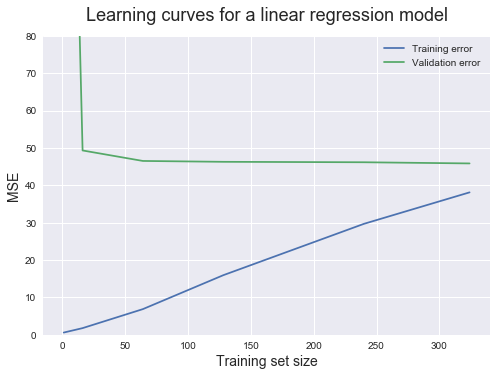

In [134]:
plt.style.use('seaborn')
plt.plot(train_sizes, lower, label = 'Training error')
plt.plot(train_sizes, upper, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,80)

Проведем небольшой анализ регрессионных остатков:

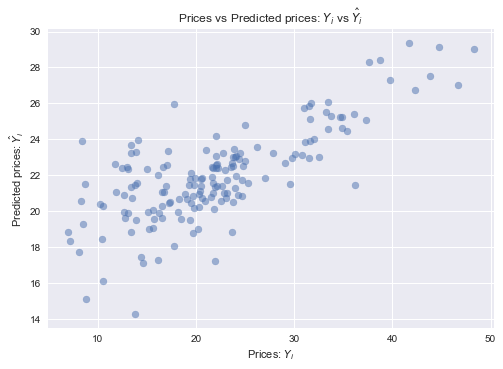

In [206]:
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$");

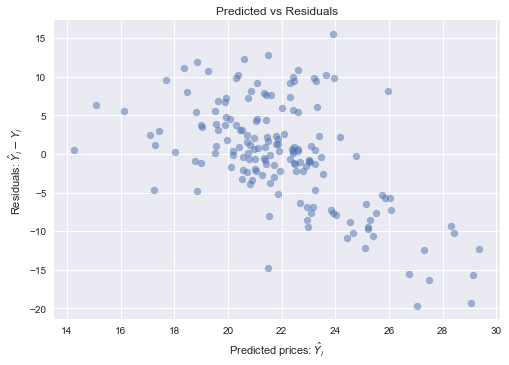

In [207]:
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Residuals: $\hat{Y}_i - Y_i$")
plt.title("Predicted vs Residuals");
plt.scatter(Y_pred, (Y_pred-Y_test), alpha=0.5);

### Если исключить выброы
R^2 = 0.366, RMSE = 6.771

In [208]:
X_init = df["RM"]
y_init = df["MEDV"]
X_train_init, X_test_init, Y_train_init, Y_test_init = train_test_split(X_init, y_init, test_size=0.33, random_state=18)

In [209]:
model_unclean = GDRegressor(alpha=0.04, n_iter=100)
model_unclean.fit(X_train_init, Y_train_init)
model_unclean.intercept_, model_unclean.coef_

(-1.0726158227418863, 3.806808761118752)

In [210]:
Y_pred_init = model_unclean.predict(X_test_init)

In [211]:
r_squared(Y_pred_init, Y_test_init), rmse(Y_pred_init, Y_test_init)

(0.35285913259014934, 7.309555219631523)

### Если оставить выброы
R^2 = 0.353, RMSE = 7.309

## Нормализация

Вы должны были обратить внимание, что увеличилось необходимое число итераций для сходимости алгоритма. Одним из способов повлиять на это является нормализация признаков. Мы будем использовать один из самых простых и распространенных способов нормализации - Standart Scaling (Z-score normalization):

$$x' = \frac{x - \overline{x}}{\sigma_x}$$

> Замечание: Про важность нормализации признаков можно почитать [тут](https://www.robertoreif.com/blog/2017/12/16/importance-of-feature-scaling-in-data-modeling-part-1-h8nla) и [тут](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling).

Напишите функцию `z_scaler` для нормализации значений:

Еще одним из распространенных методов нормализации является min-max нормализация:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Нормализацю будем проводить для ___data___

###### Z_score norm.

In [212]:
def z_scaler(feature):
    mean = np.mean(feature)
    std = np.std(feature)
    z = []
    for i in range(len(list(feature))):
        z.append((list(feature)[i]-mean)/std)
    return z

In [215]:
X_z_scaled = z_scaler(X)
y_z_scaled = z_scaler(y)

In [216]:
X_train_z_scaled, X_test_z_scaled, Y_train_z_scaled, Y_test_z_scaled = train_test_split(X_z_scaled, y_z_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.04, n_iter=2000)
model.fit(X_train_z_scaled, Y_train_z_scaled)

(0.737470221738676, -0.0032845451093428957)

In [217]:
Y_pred_z_scaled = model.predict(X_test_z_scaled)
rmse(Y_pred_z_scaled, Y_test_z_scaled), r_squared(Y_pred_z_scaled, Y_test_z_scaled)

(0.7122217078794596, 0.5714917056101048)

### После Z-scal'инга данных ___data___
R^2 = 0.571, RMSE = 0.712

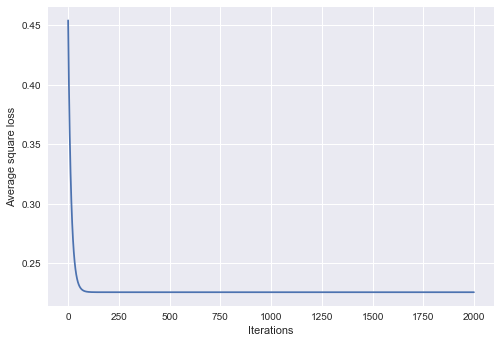

In [218]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_history);

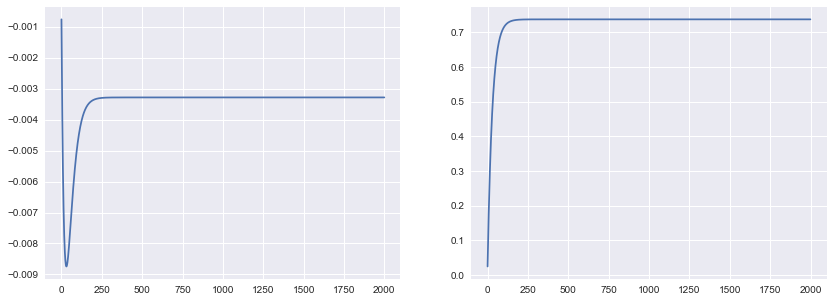

In [219]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_history)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_history);

###### Min-max norm.

In [220]:
def min_max(feature):
    ma = np.max(feature)
    mi = np.min(feature)
    min_max = []
    for i in range(len(list(feature))):
        min_max.append((list(feature)[i]-mi)/(ma-mi))
    return min_max

In [221]:
X_mm_scaled = min_max(X)
y_mm_scaled = min_max(y)

In [223]:
X_train_mm_scaled, X_test_mm_scaled, Y_train_mm_scaled, Y_test_mm_scaled = train_test_split(X_mm_scaled, y_mm_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.04, n_iter=2000)
model.fit(X_train_mm_scaled, Y_train_mm_scaled)

(0.6715892654651101, 0.0393064971090762)

In [224]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(0.7141434340631293, 0.5691761722400772)

### После mm-scal'инга данных ___data___
R^2 = 0.569, RMSE = 0.714

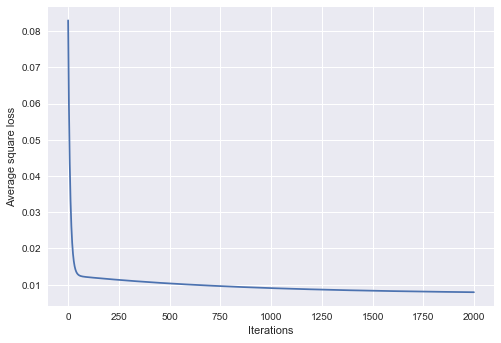

In [225]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_history);

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(init_X, init_y, test_size = 0.33, random_state = 18)

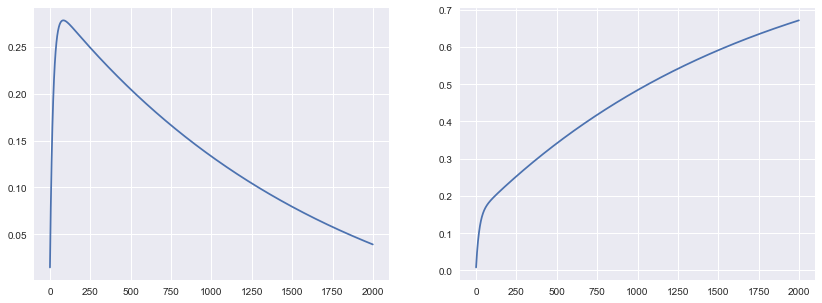

In [226]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_history)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_history);

Значения R^2 и RMSE очень близки после z-scal'инга и mm-scal'инга, поэтому сказать, какой из них даёт лучший результат при данной выборке нельзя

### Пример с использованием библиотеки sklearn

Проделаем теже шаги с использованием библиотеки `sklearn`. Для начала построим модель:

In [459]:
from sklearn.linear_model import SGDRegressor

max_iter = 100
eta0 = 0.0001
model = SGDRegressor(
    loss='squared_loss',
    learning_rate='constant',
    max_iter=max_iter,
    eta0=eta0,
    alpha=0.0002
)

Чтобы нормализовать значения для обучения и валидации модели воспользуйтесь `StandardScaler` из библиотеки `sklearn`:

Сначала для ___data___

In [460]:
X_for_ready_LR = data[["RM"]]
y_for_ready_LR = data["MEDV"]

In [461]:
X_train, X_test, Y_train, Y_test = train_test_split(X_for_ready_LR, y_for_ready_LR, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

In [476]:
len(X_test)/len(X_for_ready_LR)

0.3319587628865979

In [473]:
model.fit(X_train, Y_train.ravel())

SGDRegressor(alpha=0.0002, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [474]:
model.coef_, model.intercept_

(array([0.56397836]), array([8.65287391e-05]))

In [467]:
Y_pred_for_ready_LR = model.predict(X_test)

Чтобы найти среднеквадратичную ошибку и коэффициент детерминации:

In [307]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score(Y_test, Y_pred_for_ready_LR), mean_squared_error(Y_test, Y_pred_for_ready_LR)

(0.5531806226034095, 0.5827995213663919)

Попробуем c выбросами ___df___

In [344]:
init_X_for_ready_LR = df[['RM']]
init_y_for_ready_LR = df["MEDV"]

In [345]:
X_train, X_test, Y_train, Y_test = train_test_split(init_X_for_ready_LR, init_y_for_ready_LR, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

model.fit(X_train, Y_train.ravel())

Y_pred = model.predict(X_test)

In [346]:
r2_score(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred)

(0.49627516090861723, 0.487675136416123)

In [347]:
model.coef_, model.intercept_

(array([0.55180515]), array([8.19785037e-05]))

Для ___data___:
R^2: 0.55, RMSE = 0.58
Для ___df___:
R^2: 0.55, RMSE = 8.19e-5
Хотя стоит отметить, что эти значения постоянно меняются при повторном запуске SGDRegression от sklearn

## Mini-batch

In [391]:
class GDRegressor:

    def __init__(self, alpha=0.04, n_epoch=5, m=200, bs=20, progress=True):
        self.alpha = alpha
        self.n_epoch = n_epoch
        self.m = m
        self.bs = bs
        self.disable = not progress
        

    def fit(self, X, y):
        # PUT YOUR CODE HERE
        theta_zero = 0
        theta_one = 0
        theta_zero_history = []
        theta_one_history = []
        cost_history = []
        for i in range(self.n_epoch):
            for k in range(0, self.m, self.bs):
                X_o = list(X)[k:k+self.bs]
                y_o = list(y)[k:k+self.bs]
                
                for_cost = 0
                error_zero = 0
                error_one = 0
            
                for j in range(len(y_o)):
                    error_one += ((theta_zero + theta_one*(X_o[j]) - y_o[j])*(X_o[j]))
                for j in range(len(y_o)):
                    error_zero += (theta_zero + theta_one*(X_o[j]) - y_o[j])
                    for_cost += (theta_zero + theta_one*(X_o[j]) - y_o[j])**2
                grad_one = error_one*self.alpha/len(y)
                grad_zero = error_zero*self.alpha/len(y)
                theta_zero -= grad_zero
                theta_one -= grad_one
            
            theta_zero_history.append(theta_zero)
            theta_one_history.append(theta_one)
            cost = for_cost/(2*len(y_o))
            cost_history.append(cost)
            
        self.loss_history = cost_history
        self.intercept_history = theta_zero_history
        self.coef_history = theta_one_history
        self.coef_ = theta_one
        self.intercept_ = theta_zero
        return self.coef_, self.intercept_

    def predict(self, X_test):
        predictions = []
        
        for i in range(len(list(X_test))):
            predictions.append(self.coef_*list(X_test)[i]+self.intercept_)
        
        self.predictions = predictions
        return self.predictions

In [392]:
model = GDRegressor(alpha=0.04)
%time model.fit(X_train, Y_train)

Wall time: 10 ms


(3.38431055082519, 0.5008453223394241)